In [1]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import os
import csv
import sys
sys.path.append('/mnt/c/Users/gweld/sidewalk/sidewalk_ml/')
from GSVutils import sliding_window

batch_p_r(dir_containing_preds, scaling, clust_r, cor_r, clip_val=None):

In [9]:
clip_vals = (None, .5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6)
results = []
for cv in clip_vals:
    results.append(sliding_window.batch_p_r(sliding_window.gt_dir, 150, 1.0, clip_val = cv, preds_filename=sliding_window.pred_file_name))

Processing predictions for -YP7VVRO4_pQYPY6RtYQcg
	 Loaded 2304 predictions and 16 true labels
	 Clipped/ignored 2304 pts down to 696
	 Clustered down to 51
Returning 12 correct and 39 incorrect.
Processing predictions for 0KjoViF5xreeiPSb1RuThQ
	 Loaded 2304 predictions and 4 true labels
	 Clipped/ignored 2304 pts down to 503
	 Clustered down to 72
Returning 4 correct and 68 incorrect.
Processing predictions for 1-2MNgRG-iN6DwktcIRE_g
	 Loaded 2304 predictions and 6 true labels
	 Clipped/ignored 2304 pts down to 406
	 Clustered down to 42
Returning 6 correct and 36 incorrect.
Processing predictions for 1a1UlhadSS_3dNtc5oI10Q
	 Loaded 2304 predictions and 7 true labels
	 Clipped/ignored 2304 pts down to 797
	 Clustered down to 75
Returning 6 correct and 69 incorrect.
Processing predictions for 1AbQJspygYeCD1eXl-HHNw
	 Loaded 2304 predictions and 7 true labels
	 Clipped/ignored 2304 pts down to 660
	 Clustered down to 74
Returning 6 correct and 68 incorrect.
Processing predictions for 1

In [10]:
for cv, r in zip(clip_vals, results):
    print cv
    print r['Overall']

None
(10.459840588595954, 82.73520853540252)
0.5
(10.679245283018869, 82.34723569350145)
1
(11.600000000000001, 81.57129000969933)
1.5
(13.828164717844432, 79.14645974781766)
2
(17.755681818181817, 72.74490785645004)
2.5
(22.514005602240896, 62.3666343355965)
3
(30.28423772609819, 56.83802133850631)
3.5
(38.6586284853052, 49.75751697381183)
4
(47.006651884700666, 41.1251212415131)
4.5
(53.28000000000001, 32.29873908826382)
5
(56.04938271604938, 22.017458777885548)
5.5
(57.08502024291497, 13.676042677012608)
6
(54.761904761904766, 6.692531522793405)


Curb Cut
Obstruction
Missing Cut
Sfc Problem
Overall


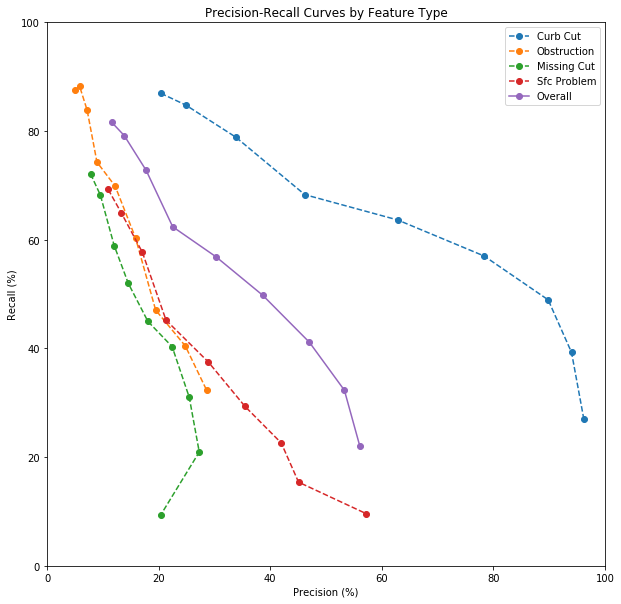

In [16]:
plt.figure(figsize=(10,10))
for label in results[0]:
    print label
    pr = [x[label] for x in results][2:-2]
    p,r = zip(*pr)
    #print pr
    #print p
    #print r
    marker = 'o'
    line   = 'dashed' if label != 'Overall' else 'solid'
    plt.plot(p, r, linestyle=line, marker=marker, label=label)
plt.xlabel('Precision (%)')
plt.ylabel('Recall (%)')
plt.xlim(0,100)
plt.ylim(0,100)
plt.title("Precision-Recall Curves by Feature Type")
plt.legend()
plt.show()

In [13]:
results = 'prelim_results.csv'

p_by_label = {}
r_by_label = {}

with open(results) as f:
    reader = csv.reader(f)
    for row in reader:
        label=row[0]
        scores=row[1:]
        precision = [float(x[1]) for x in enumerate(scores) if x[0] % 2 == 0]
        recall    = [float(x[1]) for x in enumerate(scores) if x[0] % 2 == 1]
        print label
        print precision
        print recall
        p_by_label[label] = precision
        r_by_label[label] = recall

Curb Cut
[18.47, 20.43, 33.74, 62.83, 89.8, 96.18]
[89.82, 87.1, 78.67, 63.62, 48.92, 27.06]
Obstruction
[4.71, 5.04, 7.18, 12.07, 19.45, 28.57]
[85.29, 87.5, 83.82, 69.12, 47.06, 32.35]
Missing Cut
[6.69, 7.79, 12.03, 17.76, 25.48, 20.34]
[76.74, 72.09, 58.91, 44.19, 31.01, 9.3]
Sfc Problem
[9.73, 10.95, 17.21, 28.52, 41.96, 57.14]
[75.48, 69.23, 58.17, 37.02, 22.6, 9.62]
Overall
[10.45, 11.61, 17.76, 30.13, 47.01, 56.05]
[82.64, 81.67, 72.24, 56.55, 41.23, 22.02]
